
# Minst Dataset Classification image
---



In [20]:
import keras
from keras.datasets import mnist , cifar10 , cifar100
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
import numpy as np
from keras import backend as K
import matplotlib.pyplot as plt
from keras.layers import Conv2D, MaxPooling2D
from sklearn.metrics import confusion_matrix , classification_report
import seaborn as sns


In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [ ]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 468,874 (1.79 MB)

 Trainable params: 468,874 (1.79 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [ ]:
train_model_minst = model.fit(x_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(x_test, y_test))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1153 - loss: 2.2940 - val_accuracy: 0.1212 - val_loss: 2.2932
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1307 - loss: 2.2929 - val_accuracy: 0.1135 - val_loss: 2.2918
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.1188 - loss: 2.2920 - val_accuracy: 0.1135 - val_loss: 2.2904
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.1160 - loss: 2.2903 - val_accuracy: 0.2622 - val_loss: 2.2890
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.1406 - loss: 2.2888 - val_accuracy: 0.1192 - val_loss: 2.2868
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.1199 - loss: 2.2866 - val_accuracy: 0.2175 - val_loss: 2.2842
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1550 - loss: 2.2839 - val_accuracy: 0.1368 - val_loss: 2.2812
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1579 - loss: 2

In [ ]:
score = model.evaluate(x_test, y_test)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4025 - loss: 1.9274
Test loss:  1.9082527160644531
Test accuracy:  0.4097000062465668


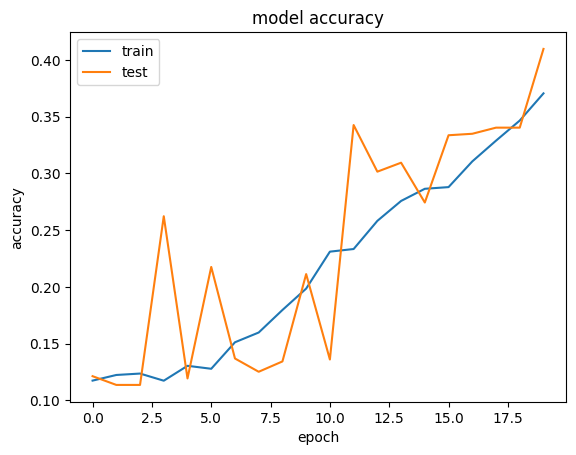

In [ ]:
plt.plot(train_model_minst.history['accuracy'])
plt.plot(train_model_minst.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Cifar Images (colored image )

In [2]:
(x_train_ci, y_train_ci), (x_test_ci, y_test_ci) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
x_train_ci.shape, y_train_ci.shape, x_test_ci.shape, y_test_ci.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [4]:
x_train_ci = x_train_ci.reshape(50000, 3072)
x_test_ci = x_test_ci.reshape(10000, 3072)
x_train_ci = x_train_ci.astype('float32')
x_test_ci = x_test_ci.astype('float32')
x_train_ci /= 255
x_test_ci /= 255

In [ ]:
model_ci = Sequential()
model_ci.add(Dense(1024, activation='relu', input_shape=(3072,)))
model_ci.add(Dense(256, activation='relu'))
model_ci.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_ci.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,411,722 (13.01 MB)

 Trainable params: 3,411,722 (13.01 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_ci.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train_model_ci = model_ci.fit(x_train_ci, y_train_ci, batch_size=32, epochs=20, verbose=1, validation_data=(x_test_ci, y_test_ci),shuffle=True)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 89s 57ms/step - accuracy: 0.3016 - loss: 1.9239 - val_accuracy: 0.3758 - val_loss: 1.7480
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 90s 58ms/step - accuracy: 0.3967 - loss: 1.6837 - val_accuracy: 0.4466 - val_loss: 1.5783
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 57ms/step - accuracy: 0.4327 - loss: 1.5832 - val_accuracy: 0.4592 - val_loss: 1.5202
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 54ms/step - accuracy: 0.4537 - loss: 1.5175 - val_accuracy: 0.4610 - val_loss: 1.5184
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 91s 58ms/step - accuracy: 0.4719 - loss: 1.4783 - val_accuracy: 0.4722 - val_loss: 1.4879
Epoch 6/20
 200/1563 ━━━━━━━━━━━━━━━━━━━━ 1:10 52ms/step - accuracy: 0.4796 - loss: 1.4567

KeyboardInterrupt: 

# LeNet

In [13]:
keras.backend.clear_session()

model = Sequential()
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(120, activation='relu'))
model.add(Dense(84, activation='relu'))
model.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 6)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 10, 10, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 400)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 120)                 │          48,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 84)                  │          10,164 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 62,006 (242.21 KB)

 Trainable params: 62,006 (242.21 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [16]:
x_train_ci = x_train_ci.reshape(50000, 32, 32, 3)
x_test_ci = x_test_ci.reshape(10000, 32, 32, 3)


In [17]:
model.fit(x_train_ci, y_train_ci, batch_size=32, epochs=20, verbose=1, validation_data=(x_test_ci, y_test_ci))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.3399 - loss: 1.7879 - val_accuracy: 0.4705 - val_loss: 1.4283
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.5074 - loss: 1.3622 - val_accuracy: 0.5413 - val_loss: 1.2797
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5511 - loss: 1.2533 - val_accuracy: 0.5480 - val_loss: 1.2662
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5869 - loss: 1.1543 - val_accuracy: 0.5853 - val_loss: 1.1802
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6110 - loss: 1.0856 - val_accuracy: 0.5903 - val_loss: 1.1390
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6360 - loss: 1.0232 - val_accuracy: 0.6068 - val_loss: 1.1210
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6527 - loss: 0.9781 - val_accuracy: 0.6065 - val_loss: 1.1005
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6678 - loss: 0.9299 

In [18]:
print(model.evaluate(x_test_ci, y_test_ci))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6163 - loss: 1.2658
[1.2899150848388672, 0.6118999719619751]


# Auto Encoder
(Encrepted - defcrepted )

In [ ]:
# auto encoder on minst dataset
model_en = Sequential()
input_img= keras.Input(shape=(784,))
encoded = Dense(512, activation='relu')(input_img)
encoded = Dense(128, activation='relu')(encoded)
encoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
model_en = keras.Model(input_img, decoded)

#model_en.add(Dense(784, activation='relu', input_shape=(784,)))
#model_en.add(Dense(512, activation='relu'))
#model_en.add(Dense(128, activation='relu'))
#model_en.add(Dense(64, activation='relu'))
#model_en.add(Dense(128, activation='relu'))
#model_en.add(Dense(512, activation='relu'))
#model_en.add(Dense(784, activation='sigmoid'))


In [ ]:
model_en.summary()

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 784)                 │         402,192 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 952,400 (3.63 MB)

 Trainable params: 952,400 (3.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_en.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train_en = model_en.fit(x_train, x_train, batch_size=32, epochs=50, verbose=1, validation_data=(x_test, x_test))

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0165 - loss: 0.0715 - val_accuracy: 0.0140 - val_loss: 0.0718
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0163 - loss: 0.0715 - val_accuracy: 0.0137 - val_loss: 0.0717
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0175 - loss: 0.0713 - val_accuracy: 0.0203 - val_loss: 0.0722
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0165 - loss: 0.0713 - val_accuracy: 0.0146 - val_loss: 0.0715
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0164 - loss: 0.0711 - val_accuracy: 0.0159 - val_loss: 0.0717
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0168 - loss: 0.0709 - val_accuracy: 0.0154 - val_loss: 0.0718
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0179 - loss: 0.0710 - val_accuracy: 0.0150 - val_loss: 0.0712
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0171 - loss: 0.0709 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


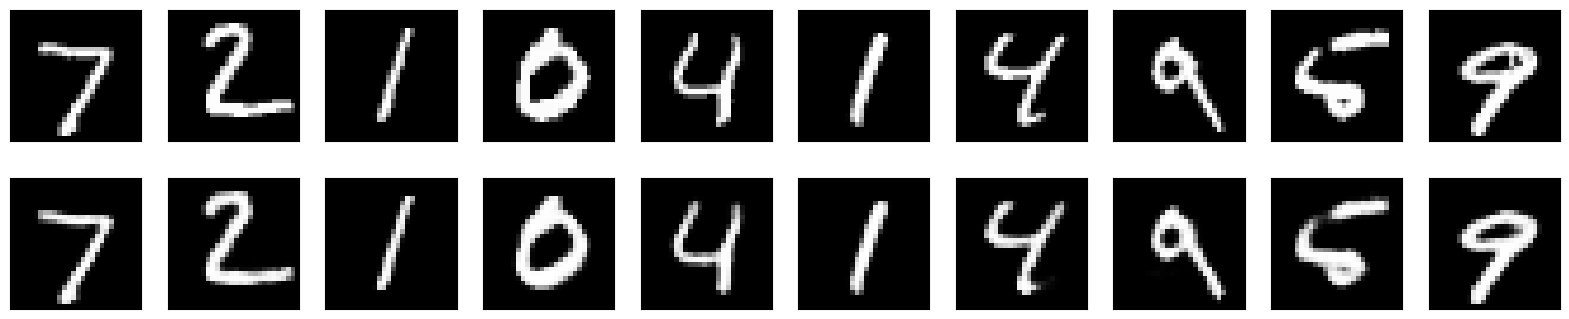

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(model_en.predict(x_test[i].reshape(1, 784)).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
# made denoising
from keras import regularizers
model_denoising = Sequential()
input_img= keras.Input(shape=(784,))
encoded = Dense(512, activation='relu', activity_regularizer=regularizers.l1(10e-5))(input_img)
encoded = Dense(128, activation='relu', activity_regularizer=regularizers.l1(10e-5))(encoded)
encoded = Dense(64, activation='relu', activity_regularizer=regularizers.l1(10e-5))(encoded)
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(512, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)
model_denoising = keras.Model(input_img, decoded)


In [ ]:
model_denoising.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_33 (Dense)                     │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_34 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_35 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_36 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 784)                 │         402,192 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 952,400 (3.63 MB)

 Trainable params: 952,400 (3.63 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_denoising.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train_denoising = model_denoising.fit(x_train, x_train, batch_size=32, epochs=50, verbose=1, validation_data=(x_test, x_test))

Epoch 1/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.0117 - loss: 0.2849 - val_accuracy: 0.0120 - val_loss: 0.2196
Epoch 2/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.0151 - loss: 0.2107 - val_accuracy: 0.0099 - val_loss: 0.1970
Epoch 3/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0142 - loss: 0.1953 - val_accuracy: 0.0146 - val_loss: 0.1906
Epoch 4/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0132 - loss: 0.1894 - val_accuracy: 0.0141 - val_loss: 0.1821
Epoch 5/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0137 - loss: 0.1802 - val_accuracy: 0.0110 - val_loss: 0.1756
Epoch 6/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0103 - loss: 0.1739 - val_accuracy: 0.0113 - val_loss: 0.1697
Epoch 7/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.0115 - loss: 0.1693 - val_accuracy: 0.0139 - val_loss: 0.1666
Epoch 8/50
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0136 - loss: 0.1667 - 

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 576ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


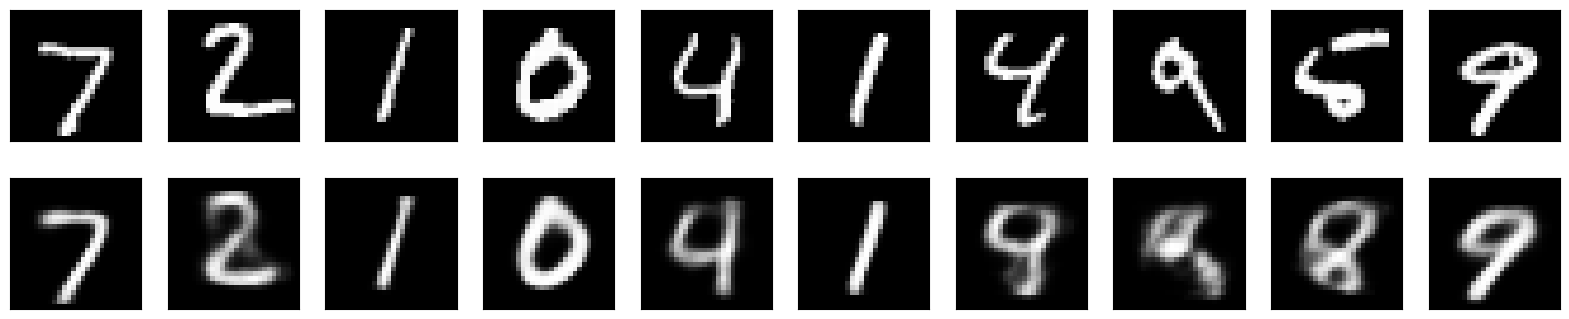

In [ ]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(model_denoising.predict(x_test[i].reshape(1, 784)).reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Cifar10 using CNN

In [ ]:
(x_train_cnn, y_train_cnn), (x_test_cnn, y_test_cnn) = cifar10.load_data()

In [ ]:
x_train_cnn.shape, y_train_cnn.shape, x_test_cnn.shape, y_test_cnn.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
x_train_cnn = x_train_cnn.astype('float32')
x_test_cnn = x_test_cnn.astype('float32')
x_train_cnn /= 255
x_test_cnn /= 255

In [ ]:
model_cifar_cnn = Sequential()
model_cifar_cnn.add(Conv2D(filters = 32, kernel_size= (3, 3), activation='relu', input_shape=(32, 32, 3) , padding = 'same'))
model_cifar_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cifar_cnn.add(Conv2D(filters =64 , kernel_size= (3, 3), activation='relu', padding = 'same'))
model_cifar_cnn.add(MaxPooling2D(pool_size=(2, 2)))
model_cifar_cnn.add(Flatten())
model_cifar_cnn.add(Dense(128, activation='relu'))
model_cifar_cnn.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_cifar_cnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_cifar_cnn.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train_cifar_cnn = model_cifar_cnn.fit(x_train_cnn, y_train_cnn, batch_size=32, epochs=20, verbose=1, validation_data=(x_test_cnn, y_test_cnn))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.4180 - loss: 1.5932 - val_accuracy: 0.6328 - val_loss: 1.0547
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6405 - loss: 1.0189 - val_accuracy: 0.6549 - val_loss: 0.9892
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6930 - loss: 0.8750 - val_accuracy: 0.6797 - val_loss: 0.9231
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7344 - loss: 0.7634 - val_accuracy: 0.6942 - val_loss: 0.8960
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7667 - loss: 0.6682 - val_accuracy: 0.7047 - val_loss: 0.8773
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7911 - loss: 0.5928 - val_accuracy: 0.6979 - val_loss: 0.9021
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8209 - loss: 0.5072 - val_accuracy: 0.7110 - val_loss: 0.9057
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8492 - loss: 0.4311 -

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

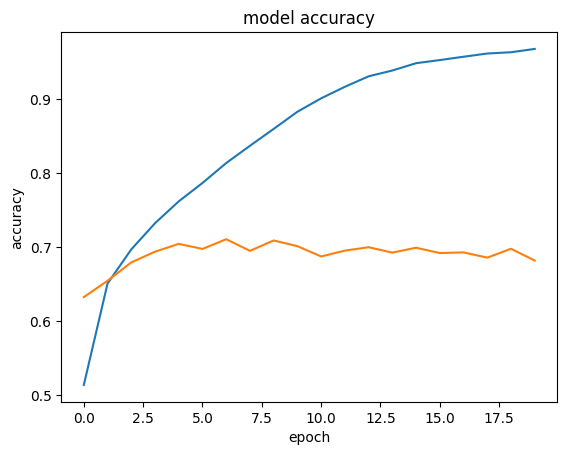

In [ ]:
from matplotlib import pyplot as plt
plt.plot(train_cifar_cnn.history['accuracy'])
plt.plot(train_cifar_cnn.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt

#  Cifar100

In [ ]:
(x_train_c100 , y_train_c100), (x_test_c100, y_test_c100) = cifar100.load_data()

In [ ]:
x_train_c100.shape, y_train_c100.shape, x_test_c100.shape, y_test_c100.shape

((50000, 32, 32, 3), (50000, 1), (10000, 32, 32, 3), (10000, 1))

In [ ]:
x_train_c100 = x_train_c100.astype('float32')
x_test_c100 = x_test_c100.astype('float32')
x_train_c100 /= 255
x_test_c100 /= 255

In [ ]:
model_cifar_cnn_c100 = Sequential()
model_cifar_cnn_c100.add(Conv2D(filters = 32, kernel_size= (3, 3), activation='relu', input_shape=(32, 32, 3) , padding = 'same'))
model_cifar_cnn_c100.add(MaxPooling2D(pool_size=(2, 2)))
model_cifar_cnn_c100.add(Conv2D(filters =64 , kernel_size= (3, 3), activation='relu', padding = 'same'))
model_cifar_cnn_c100.add(MaxPooling2D(pool_size=(2, 2)))
model_cifar_cnn_c100.add(Flatten())
model_cifar_cnn_c100.add(Dense(128, activation='relu'))
model_cifar_cnn_c100.add(Dense(10, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model_cifar_cnn_c100.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 545,098 (2.08 MB)

 Trainable params: 545,098 (2.08 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_cifar_cnn_c100.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
train_cifar100_cnn = model_cifar_cnn_c100.fit(x_train_c100, y_train_c100, batch_size=32, epochs=20, verbose=1, validation_data=(x_test_c100, y_test_c100))


Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.0100 - loss: nan - val_accuracy: 0.0100 - val_loss: nan
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.0106 - loss: nan - val_accuracy: 0.0100 - val_loss: nan
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.0095 - loss: nan - val_accuracy: 0.0100 - val_loss: nan
Epoch 4/20
1089/1563 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.0104 - loss: nan

KeyboardInterrupt: 

# CNN On CT Scan

In [ ]:
!pip install kaggle


In [ ]:
!kaggle datasets download -d kabil007/lungcancer4types-imagedataset


Dataset URL: https://www.kaggle.com/datasets/kabil007/lungcancer4types-imagedataset
License(s): apache-2.0
 99% 117M/119M [00:03<00:00, 40.8MB/s]
100% 119M/119M [00:03<00:00, 33.8MB/s]


In [ ]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout


In [ ]:
# Paths to dataset folders
train_dir = '/content/lungcancer/Data/train'
val_dir = '/content/lungcancer/Data/valid'
test_dir = '/content/lungcancer/Data/test'

# Create the dataset without rescaling initially
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    labels='inferred',  # Assuming labels are inferred from subdirectories
    label_mode='int',  # Assuming integer labels
    image_size=(224, 224),  # Adjust as needed
    interpolation='nearest',
    batch_size=32,
    shuffle=True
)



Found 613 files belonging to 4 classes.


In [ ]:
# Create the dataset without rescaling initially
val_dataset = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    labels='inferred',  # Assuming labels are inferred from subdirectories
    label_mode='int',  # Assuming integer labels
    image_size=(224, 224),  # Adjust as needed
    interpolation='nearest',
    batch_size=32,
    shuffle=True
)


Found 72 files belonging to 4 classes.


In [ ]:
# Create the dataset without rescaling initially
test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    labels='inferred',  # Assuming labels are inferred from subdirectories
    label_mode='int',  # Assuming integer labels
    image_size=(224, 224),  # Adjust as needed
    interpolation='nearest',
    batch_size=32,
    shuffle=True
)


Found 315 files belonging to 4 classes.


In [ ]:
# Apply rescaling using the map function
def rescale_image(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    image = image / 255.0  # Rescale to [0, 1]
    return image, label

train_dataset = train_dataset.map(rescale_image)
val_dataset = val_dataset.map(rescale_image)
test_dataset = test_dataset.map(rescale_image)

In [ ]:
model_ct = Sequential()
model_ct.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))  # Input shape matches image size
model_ct.add(MaxPooling2D((2, 2)))
model_ct.add(Conv2D(64, (3, 3), activation='relu'))
model_ct.add(MaxPooling2D((2, 2)))
model_ct.add(Conv2D(128, (3, 3), activation='relu'))
model_ct.add(MaxPooling2D((2, 2)))
model_ct.add(Flatten())
model_ct.add(Dense(128, activation='relu'))
model_ct.add(Dense(4, activation='softmax'))  # 4 output classes for lung cancer types

model_ct.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,476 (42.61 MB)

 Trainable params: 11,169,476 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model_ct.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
train_ct = model_ct.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 15s 401ms/step - accuracy: 0.2632 - loss: 1.3799 - val_accuracy: 0.3194 - val_loss: 1.4038
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 132ms/step - accuracy: 0.3052 - loss: 1.3483 - val_accuracy: 0.3889 - val_loss: 1.6102
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - accuracy: 0.3969 - loss: 1.2503 - val_accuracy: 0.2361 - val_loss: 1.2772
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 0.4804 - loss: 1.1086 - val_accuracy: 0.3056 - val_loss: 1.1721
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.4604 - loss: 1.0557 - val_accuracy: 0.4583 - val_loss: 1.0950
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - accuracy: 0.5894 - loss: 0.9176 - val_accuracy: 0.4722 - val_loss: 1.1246
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 205ms/step - accuracy: 0.5496 - loss: 0.9008 - val_accuracy: 0.4861 - val_loss: 1.1944
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 131ms/step - accuracy: 0.6178 - loss: 0.8319 - val_accuracy: 0

Text(0.5, 0, 'epoch')

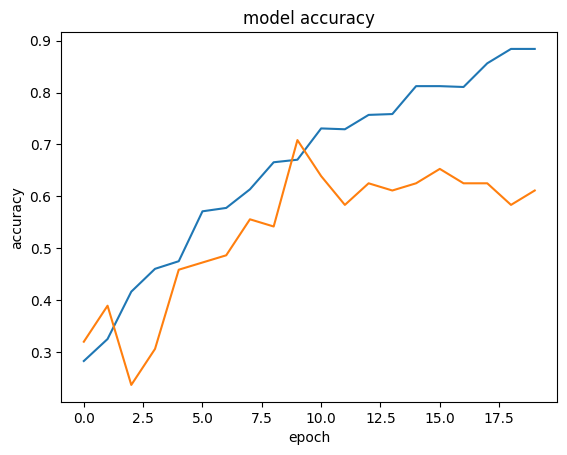

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_ct.history['accuracy'])
plt.plot(train_ct.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')